In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from hmmlearn import hmm

In [3]:
dataset = pd.read_csv('GoogleStocks.csv', sep=',')
data = dataset.values
data = data[1:]
# data = data[data[:,0].argsort()]

In [4]:
def normalize(data):
    norm = MinMaxScaler(feature_range=(0, 1))
    data_normalized = norm.fit_transform(data)
    return data_normalized

In [5]:
def data_preprocessing(data):
    #normalization of input
    data[:, 1:] = normalize(data[:, 1:])

    #calculating average of low and high
    average = (data[:, 4] + data[:, 5]) / 2
    average = np.reshape(average, (average.shape[0], 1))
    data = np.append(data, average, axis=1)

    return data

In [6]:
def plot(predicted, actual):
    plt.plot(predicted[:, 1], label="predicted")
    plt.plot(actual[:, 1], label="actual")
    plt.legend(loc="best")
    plt.show()

In [7]:
data = data_preprocessing(data)

/home/aman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
hidden_states = [4, 8, 12]
timesteps = [20, 50, 75]
max_iter = 10000
test_length = 100

In [11]:
def get_model(i, h, train_data):
    if i == test_length - 1:
        model = hmm.GaussianHMM(
            n_components=h,
            covariance_type='full',
            n_iter=max_iter,
            init_params='stmc')
    else:
        model = hmm.GaussianHMM(
            n_components=h,
            covariance_type='full',
            n_iter=max_iter,
            init_params='')
        model.means_ = means_retune_prior
        model.startprob_ = startprob_retune_prior
        model.covars_ = covars_retune_prior
        model.transmat_ = transmat_retune_prior

    model.fit(np.flipud(train_data))
    return model

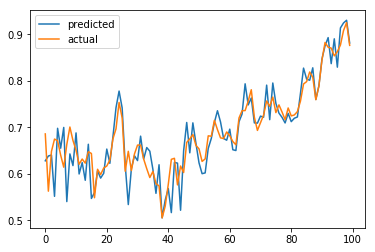

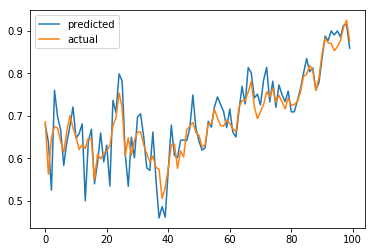

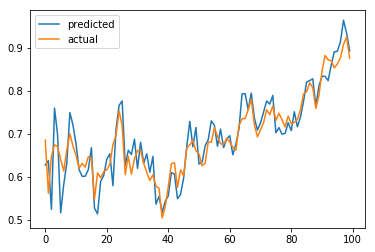

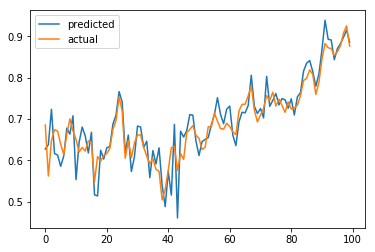

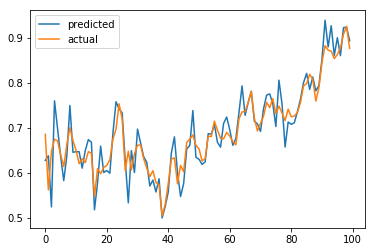

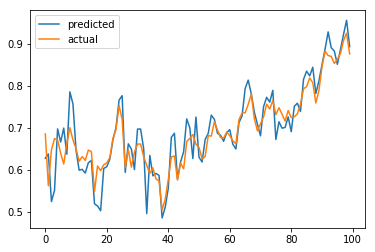

KeyboardInterrupt: 

In [10]:
for h in hidden_states:
    for t in timesteps:
        required_data = data[:, [2, 3, 6]]
        predicted = np.empty([0, required_data.shape[1]])
        actual = np.empty([0, required_data.shape[1]])

        i = test_length - 1
        model = hmm.GaussianHMM(
            n_components=h,
            covariance_type='full',
            n_iter=max_iter,
            init_params='stmc')
        while (i >= 0):
            test_data = required_data[i, :]
            train_data = required_data[i + 1:, :]

#             model = get_model(i, h, train_data)
            model.fit(np.flipud(train_data))

            curr_likelihood = model.score(np.flipud(train_data[0:t - 1, :]))
            past_likelihood = []
            iters = 1
            while iters < len(train_data) / t - 1:
                past_likelihood = np.append(
                    past_likelihood,
                    model.score(np.flipud(train_data[iters:iters + t - 1, :])))
                iters = iters + 1
            likelihood_diff_i = np.argmin(
                np.absolute(past_likelihood - curr_likelihood))
            predicted_change = train_data[likelihood_diff_i, :] - train_data[
                likelihood_diff_i + 1, :]
            predicted.append(test_data + predicted_change)
            actual.append(actual, test_data)
            i -= 1
        plot(predicted, actual)